In [2]:
# Import dependencies

import pandas as pd
import numpy as np
import pycaret
from sklearn.utils import resample
from pycaret.classification import *

In [20]:
#Import dataframe

df = pd.read_excel('BD_Balanços.xlsx', sheet_name='BD_final', na_values="n.a.")

In [22]:
# Setting up training with SMOTE

s = setup(df, target = 'FMAL_total', session_id = 123, fix_imbalance=True, fix_imbalance_method='SMOTE')

,Description,Value
0,Session id,123
1,Target,FMAL_total
2,Target type,Binary
3,Original data shape,"(308, 968)"
4,Transformed data shape,"(503, 968)"
5,Transformed train set shape,"(410, 968)"
6,Transformed test set shape,"(93, 968)"
7,Numeric features,966
8,Categorical features,1
9,Rows with missing values,0.3%


In [23]:
#Comparing models

best = compare_models(include=['rf','mlp','svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9582,0.9877,0.1000,0.1000,0.1000,0.1000,0.1000,1.2120
svm,SVM - Linear Kernel,0.9535,0.9219,0.6000,0.4000,0.4500,0.4386,0.4645,0.3630
mlp,MLP Classifier,0.9442,0.6379,0.3000,0.2000,0.2333,0.2143,0.2233,0.4630


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

In [24]:
# Train SVM class
svm = create_model('svm')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9091,1.0000,1.0000,0.3333,0.5000,0.4634,0.5492
1,0.9545,0.8571,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.9545,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.9545,0.7619,0.0000,0.0000,0.0000,0.0000,0.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.9048,1.0000,1.0000,0.3333,0.5000,0.4615,0.5477
7,0.9048,0.9000,1.0000,0.3333,0.5000,0.4615,0.5477
8,0.9524,0.7000,0.0000,0.0000,0.0000,0.0000,0.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

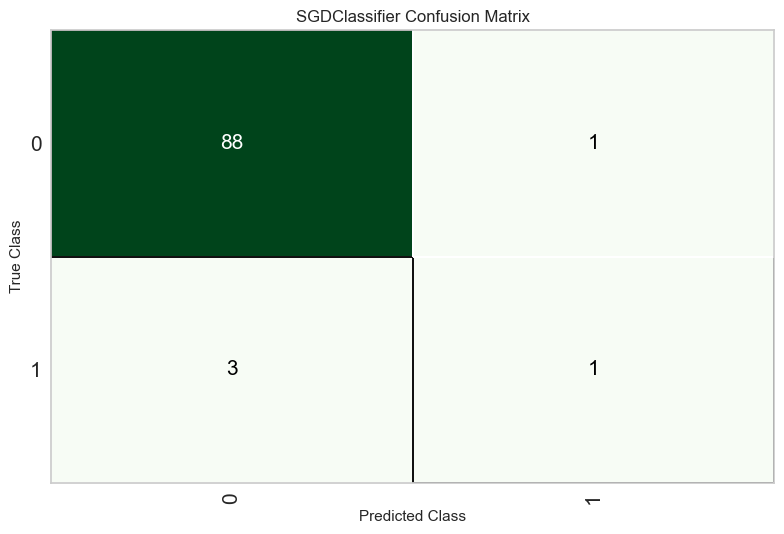

In [26]:
# Plot confusion matrix 

plot_model(svm, plot = 'confusion_matrix', scale=1)

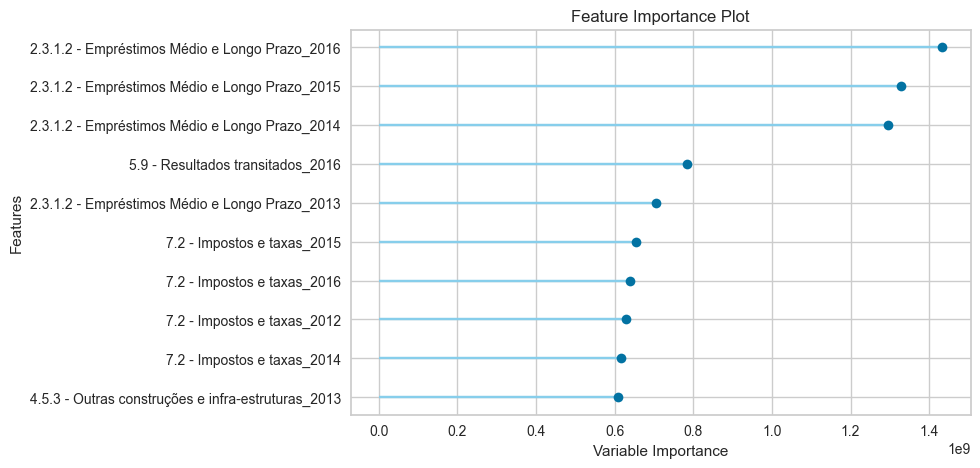

In [27]:
# Plot feature importance

plot_model(svm, plot = 'feature')

In [4]:
# Define the minority and majority class

minority_class = df[df['FMAL_total'] == 1]
majority_class = df[df['FMAL_total'] == 0]

# Downsample the majority class
majority_downsampled = resample(majority_class, replace=False, n_samples=len(minority_class), random_state=42)

# Combine the downsampled majority class with the minority class
df_maj = pd.concat([minority_class, majority_downsampled])

# Prepare df for training with undersampling
df_maj
df_ml_maj = df_maj.drop(['Municípios/Rubrica_ano'], axis=1)

In [5]:
# Setting up with Undersampling

s = setup(df_ml_maj, target = 'FMAL_total', session_id = 123)

,Description,Value
0,Session id,123
1,Target,FMAL_total
2,Target type,Binary
3,Original data shape,"(28, 967)"
4,Transformed data shape,"(28, 967)"
5,Transformed train set shape,"(19, 967)"
6,Transformed test set shape,"(9, 967)"
7,Numeric features,966
8,Preprocess,True
9,Imputation type,simple


In [6]:
# Comparing models with undersampling

best = compare_models(include=['rf','mlp','svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8500,0.8000,0.8000,0.7500,0.7667,nan,0.6000,0.8010
svm,SVM - Linear Kernel,0.7500,0.8000,0.6000,0.6000,0.6000,nan,0.4000,0.0560
mlp,MLP Classifier,0.6500,0.5500,0.7000,0.5500,0.6000,nan,0.2000,0.0590


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

In [7]:
# Create model Random Forest class

rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.5000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
2,0.5000,0.0000,1.0000,0.5000,0.6667,0.0000,0.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,0.5000,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

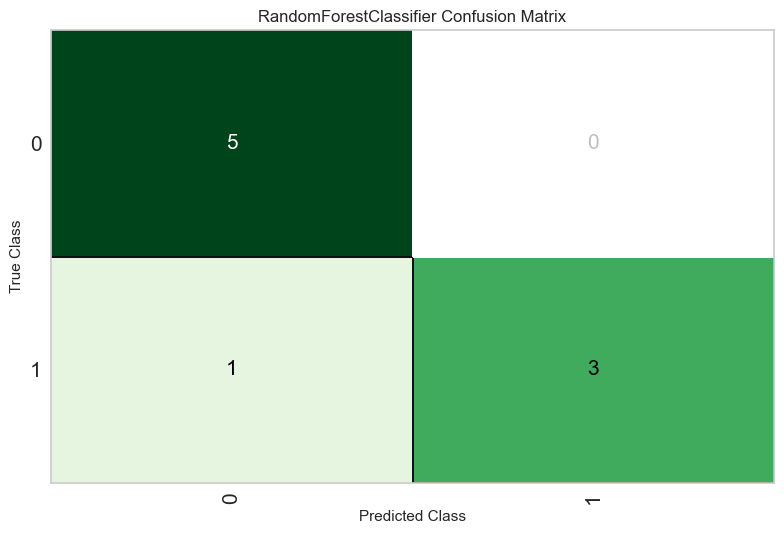

In [8]:
# Plot confusion matrix

plot_model(rf, plot = 'confusion_matrix')

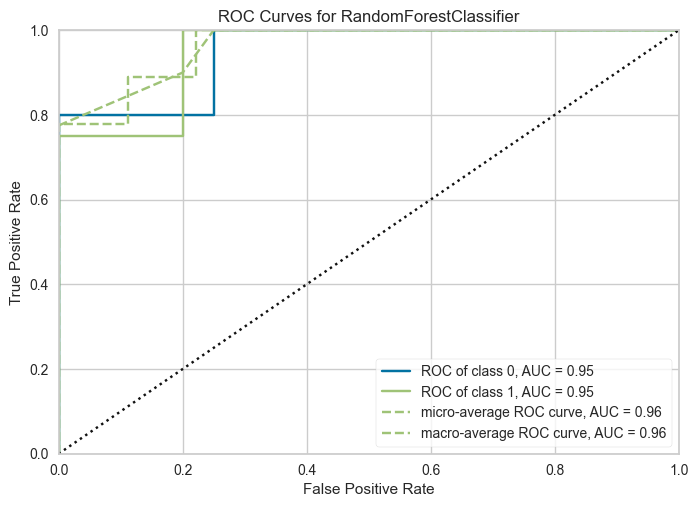

In [44]:
# Plot AUC

plot_model(rf, plot = 'auc')

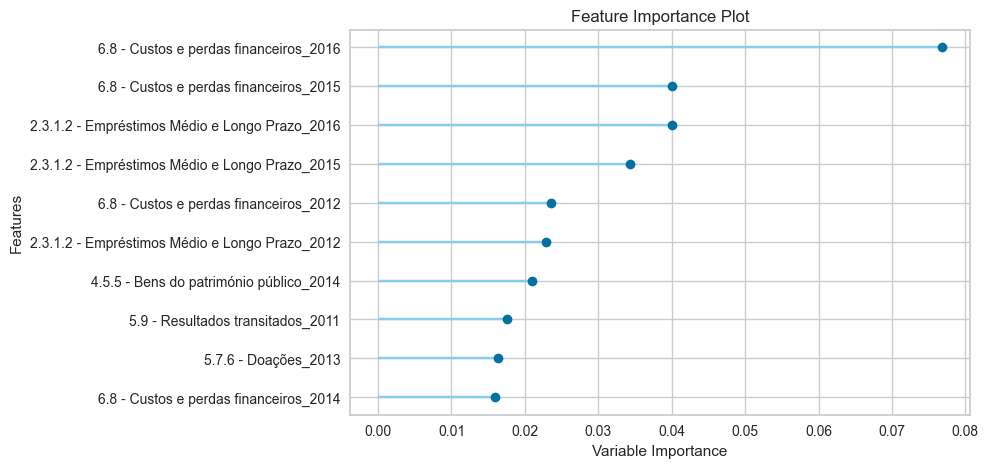

In [45]:
# Plot feature importance

plot_model(rf, plot = 'feature')

In [10]:
# Oversample the minority class
minority_oversampled = resample(minority_class, 
                                replace=True, 
                                n_samples=len(majority_class), 
                                random_state=42)

# Combine the oversampled minority class with the majority class
df_balanced = pd.concat([majority_class, minority_oversampled])

# Drop the 'Municípios/Rubrica_ano' column
df_over_samp = df_balanced.drop(['Municípios/Rubrica_ano'], axis=1)
df_over_samp.reset_index(inplace=True)

In [12]:
# Setting up the experiment with Oversampling

s = setup(df_over_samp, target = 'FMAL_total', session_id = 123, fold_shuffle=True )

,Description,Value
0,Session id,123
1,Target,FMAL_total
2,Target type,Binary
3,Original data shape,"(588, 968)"
4,Transformed data shape,"(588, 968)"
5,Transformed train set shape,"(411, 968)"
6,Transformed test set shape,"(177, 968)"
7,Numeric features,967
8,Rows with missing values,0.2%
9,Preprocess,True


In [13]:
# Comparing models with oversampling

best = compare_models(include=['rf','mlp','svm'])

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9951,1.0000,1.0000,0.9907,0.9952,0.9902,0.9905,0.9220
mlp,MLP Classifier,0.9830,0.9829,1.0000,0.9681,0.9836,0.9659,0.9669,0.1580
svm,SVM - Linear Kernel,0.9830,0.9912,1.0000,0.9688,0.9838,0.9660,0.9672,0.0700


Processing:   0%|          | 0/17 [00:00<?, ?it/s]

In [14]:
# Create model Random Forest class

rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
1,0.9756,1.0000,1.0000,0.9545,0.9767,0.9511,0.9523
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
4,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
5,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
6,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
7,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
8,0.9756,1.0000,1.0000,0.9524,0.9756,0.9512,0.9524


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

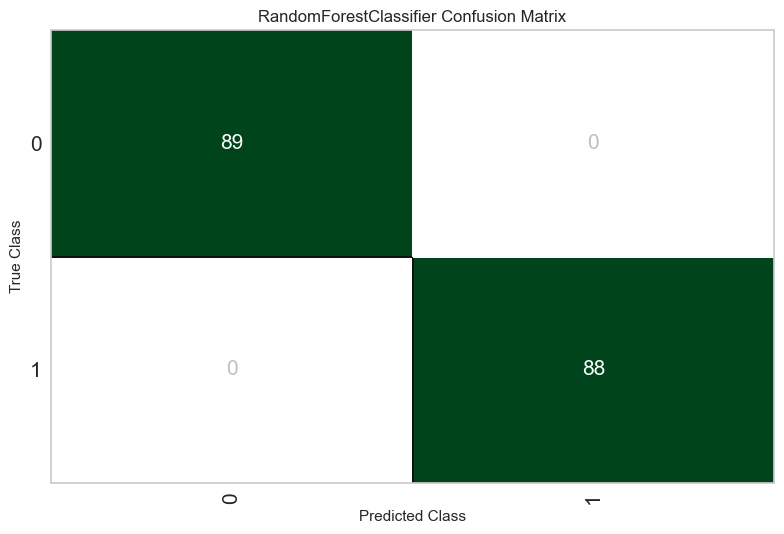

In [15]:
# Plot confusion matrix

plot_model(rf, plot = 'confusion_matrix')

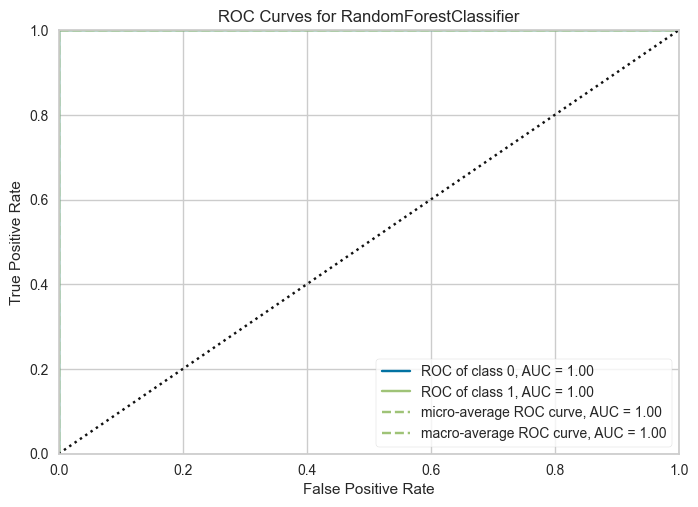

In [81]:
# Plot AUC

plot_model(rf, plot = 'auc')

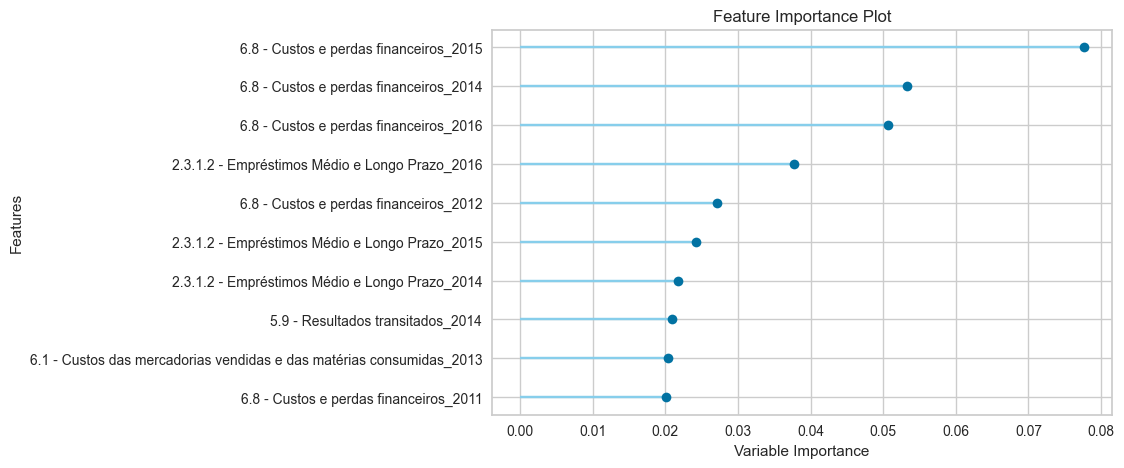

In [82]:
# Plot feature importance

plot_model(rf, plot = 'feature')